# Lab	2:	Sentiment Classification	with Support Vector Machine

### **Aim:**
  • Understanding	Support Vector Machine	Classification technique

  • Get	familiar	with	data	analysis	process.

  • Learning	to	employ	Python	to	do	data	analysis

### **Materials:**
We	provide	you	with	three datasets	we	got	from	a	social	media	site:		
1. training dataset,	train.csv
2. test	dataset,	test.csv
3. evaluation	dataset,	evaluation.csv

### **Requirements:**
1. Using	Python	to	create	your	own	SVM	classifier and	train	the	network to	classify	data	
into	two	sentiment	classes:	”positive”	and	”negative”. You	decide	how	to	build	your	
own	SVM	classifier,	for	example,	using	linear	or	nonlinear SVM,	the	type of	kernels	
you	would	like	to	use.
2. Validate your	classifier with	the	test	dataset.
3. Applying	your	classifier	to	the	evaluation	dataset	to	measure	the	performance.	You	
decide	which	criteria	you	would	like	to	use.	In	the	best	case	you	can	try	to	measure	
the	performance	with	all	combinations	of	indicators	(accuracy/error	rate,	
sensitivity/specificity,	precision/recall,	or	ROC).
4. Write	a lab	report	containing:

	1)	title	
  2)	names	and	team	
  3)	systematic	diagram	of	your	sentiment	analysis	process,	including	training	and	testing;	
  4)	feature	extraction;	
  5)	evaluation;	
  6)	results;
  7)	comparison	with	the	results	from your	Naïve	Bayesian	
classifier;	
8)	the link	to	your	code	(or	upload	your	code).

## Data Exploration

### Packages

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
#######################
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# general NLP preprocessing and basic tools
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# train/test split
import sklearn as skl
from sklearn.model_selection import train_test_split
# basic machine learning models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
# our evaluation metric for sentiment classification
from sklearn.metrics import f1_score, fbeta_score, confusion_matrix


### Loading Data

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
eval_df = pd.read_csv('evaluation.csv')

### Data Analysis


In [ ]:
print("Number of tweets in training set:", len(train_df))
print("Number of tweets in testing set:", len(test_df))
print("Number of tweets in evaluation set:", len(eval_df))
print("Total number of tweets:", len(train_df)+len(test_df)+len(eval_df))

Number of tweets in training set: 7500
Number of tweets in testing set: 2500
Number of tweets in evaluation set: 5000
Total number of tweets: 15000


In [ ]:
train_df.head(10)

,score,text
0,0,"overgeneralized, not helpful to anyone serious..."
1,1,Great sound and service.
2,1,love this book!!!: this book is a fast read ab...
3,1,A hugely enjoyable screen version of Rona Jaff...
4,0,What an uninteresting hodge-podge. It could ha...
5,1,@USAirways customer service at its best! Rache...
6,0,@VirginAmerica Is it normal to receive no repl...
7,0,Imagine the worst skits from Saturday Night Li...
8,0,This is one of the worst films ever. I like ch...
9,1,@JetBlue flight attendant Wendi on Flt 127 on ...


In [ ]:
test_df.head(10)

,score,text
0,1,The vigilante has long held a fascination for ...
1,0,This is a VERY average phone with bad battery ...
2,0,THIS CONTAINS SPOILERS.<br /><br />I have rare...
3,1,@SouthwestAir knows whats up! That #BlackHisto...
4,0,@JetBlue Sure did go south after breakfast tho...
5,1,@SouthwestAir think you have great people work...
6,1,I exchanged the sony ericson z500a for this an...
7,1,"Good product, good seller."
8,0,@AmericanAir customer service (if you can call...
9,0,@united called back and I've been on hold. Wha...


In [ ]:
def plot_dist(df, type):
  ax = sns.countplot(df.score)
  plt.xlabel('Sentiment')
  plt.title('Distribution of the labels in the '+ type +' dataset')
  for p in ax.patches:
     ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))
  #plt.savefig("distribution.png")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


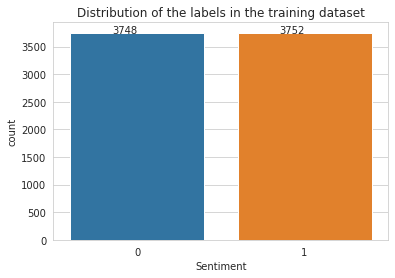

In [ ]:
plot_dist(train_df, 'training')

In [ ]:
print("Number of missing values: ", train_df.isnull().sum().sum())


Number of missing values:  0


In [ ]:
cnt_1, cnt_2, cnt_3 = 0, 0, 0
max_len, min_len, mean_len = -float("inf"), float("inf"), 0
for row in train_df.values:
    tweet = row[1]  # 1 index for tweet
    if "@" in tweet:
        cnt_1 += 1
    if "#" in tweet:
        cnt_2 += 1
    if 'http' or 'www' in tweet:
        cnt_3 += 1
    if len(tweet) < min_len:
        min_len = len(tweet)
    if len(tweet) > max_len:
        max_len = len(tweet)

    mean_len += len(tweet)
    
mean_len /= len(train_df)
    
print(f'Number of texts having mentions: {cnt_1}')
print(f'Number of texts having hashtags: {cnt_2}')
print(f'Number of texts having urls: {cnt_3}')
print(f'min_len:{min_len} max_len:{max_len} mean_len:{mean_len}')

Number of texts having mentions: 2650
Number of texts having hashtags: 520
Number of texts having urls: 7500
min_len:11 max_len:7126 mean_len:595.5464


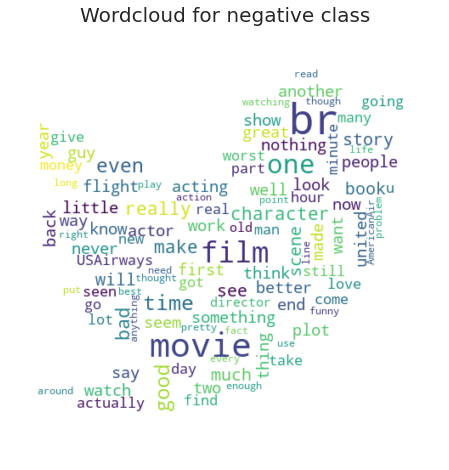

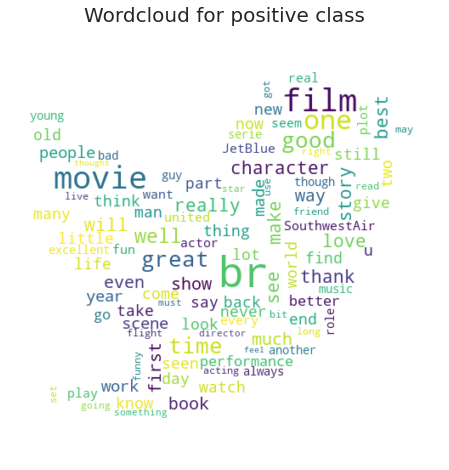

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

from PIL import Image
mask_dir = np.array(Image.open('twitter_mask3.jpg'))

wordcloud1 = WordCloud(stopwords=stopwords,max_font_size=50,max_words=100,collocations=False, mask=mask_dir, background_color='white').generate(" ".join(review for review in train_df[train_df.score==0]['text']))
# plt.subplot(1,3,2)
plt.figure(figsize=(8,8))
plt.title("Wordcloud for negative class", fontsize=20)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud2 = WordCloud(stopwords=stopwords,max_font_size=50,max_words=100,collocations=False, mask=mask_dir, background_color='white').generate(" ".join(review for review in train_df[train_df.score==1]['text']))
# plt.subplot(1,3,3)
plt.figure(figsize=(8,8))
plt.title("Wordcloud for positive class", fontsize=20)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()





## Data Preprocessing

In [ ]:
# Handling Missing Values : 
def fillna(df) :
    show = df.count() - df.isna().count()
    print("Here's the count list of missing values {}".format(show.to_frame()))
    values = {"score": 0, "text": "Negative"}
    df.fillna(value=values)

In [ ]:
pip install emoji 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 2.1 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=acb726e649b7752c52b8b1e9d35cffcb0d7aa9817aa31db528ab1ba950332b48
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import string
from emoji import demojize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
punc_list = string.punctuation
ps = nltk.PorterStemmer()
ls = nltk.LancasterStemmer()
wn = nltk.WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
chat_dict = dict([("hmmyou",""),("sry","sorry"),("inlove","in love"),("thats",""),("wanna",""),
                  ("soo","so"),("inlove","in love"),("amazingwell","amazing well"),
                  ("messagesorry","message sorry"),("½",""),("tomorrowneed","tomorrow need"),
                  ("tomorrowis","tomorrow is"),("amusedtime","amused time"),("weekendor","weekend or"),
                  ("competitionhope","competition hope"),("partypicnic","party picnic"),
                  ("ahmazing","amazing"),("wont","will not"),("didnt","did not"),("dont","do not"),
                  ("lookin","looking"),("u","you"),("youre","you are"),("nite","night"),("isnt","is not"),
                  ("k",""),("is",""),("doesnt","does not"),("l",""),("x",""),("c",""),("ur","your"),
                  ("e",""),("yall","you all"),("he",""),("us",""),("okim","ok i am"),("jealousi","jealous"),
                  ("srry","sorry"),("itll","it will"),("vs",""),("weeknend","weekend"),("w",""),
                  ("yr","year"),("youve","you have"),("havent","have not"),("iï",""),("gonna","going to"),
                  ("gimme","give me"),("ti",""),("ta",""),("thru","through"),("th",""),("imma","i am going to"),
                  ("wasnt","was not"),("arent","are not"), ("bff","best friend forever"),("sometimesdid","sometimes did"),
                  ("waitt","wait"),("bday","birthday"),("toobut","too but"),("showerand","shower and"),
                  ("innit","is not it"),("surgury","surgery"),("soproudofyo","so proud of you"),("p",""),
                  ("couldnt","could not"),("dohforgot","forgot"),("rih","right"),("b",""),("bmovie","movie"),
                  ("pleaseyour","please your"),("tonite","tonight"),("grea","great"),("se",""),("soonso","soon so"),
                  ("gettin","getting"),("blowin","blowing"),("coz","because"),("thanks","thank"),("st",""),("rd",""),
                  ("gtta","have got to"),("gotta","have got to"),("anythingwondering","anything wondering"),
                  ("annoyedy","annoyed"),("p",""),("beatiful","beautiful"),("multitaskin","multitasking"),
                  ("nightmornin","night morning"),("thankyou","thank you"),("iloveyoutwoooo","i love you two"),
                  ("tmwr","tomorrow"),("wordslooks","words looks"),("ima","i am going to"),("liek","like"),("mr",""),
                  ("allnighter","all nighter"),("tho","though"),("ed",""),("fyou",""),("footlong","foot long"),
                  ("placepiggy","place piggy"),("semiflaky","semi flaky"),("gona","going to"),("tmr","tomorrow"),
                  ("ppl","people"),("n",""),("dis","this"),("dun","done"),("houseee","house"),("havee","have"),
                  ("studyingwhew","studying whew"),("awwyoure","aww you are"),("softyi","softy"),
                  ("weddingyou","wedding you"),("hassnt","has not"),("lowerleft","lower left"),("anywayss","anyway"),
                  ("adoarble","adorable"),("blogyeahhhh","blog yeahhhh"),("billsim","bills i am"),("ps",""),
                  ("cheescake","cheesecake"),("morningafternoonnight","morning after noon night"),
                  ("allstudying","all studying"),("ofcoooursee","of course"),("jst","just"),("shes","she is"),
                  ("sonicswhich","sonics which"),("ouchwaited","ouch waited"),("itll","it will"),("orreply","or reply"),
                  ("somethin","something"),("fridayand","friday and"),("outta","out of"),("herenever","here never"), 
                  ("ain't","am not "),("aren't","are not"),("can't","cannot"),("can't've","cannot have"),("'cause","because"),
                  ("could've", "could have"),("couldn't", "could not"),("couldn't've", "could not have"),("didn't", "did not"),
                  ("doesn't", "does not"),("don't", "do not"),("hadn't", "had not"),("hadn't've", "had not have"),("hasn't", "has not"),
                  ("haven't", "have not"),("he'd", "he had / he would"),("he'd've", "he would have"),("he'll", "he shall / he will"),
                  ("he'll've", "he will have"),("he's", "he has / he is"),("how'd", "how did"),("how'd'y", "how do you"),
                  ("how'll", "how will"),("how's", "how is"),("i'd", "I had"),("i'd've", "I would have"),("i'll", "I will"),
                  ("i'll've", "I will have"),("i'm", "I am"),("i've", "I have"),("isn't", "is not"),("it'd", "it would"),("it'd've", "it would have"),
                  ("it'll", "it will"),("it'll've", "it will have"),("it's", "it is"),("let's", "let us"),("ma'am", "madam"),
                  ("mayn't", "may not"),("might've", "might have"),("mightn't", "might not"),("mightn't've", "might not have"),
                  ("must've", "must have"),("mustn't","must not"),("mustn't've", "must not have"),("needn't", "need not"),
                  ("needn't've", "need not have"),("o'clock", "of the clock"),("oughtn't", "ought not"),("oughtn't've", "ought not have"),
                  ("shan't", "shall not"),("sha'n't", "shall not"),("shan't've", "shall not have"),("she'd", "she would"),
                  ("she'd've", "she would have"),("she'll", "she will"),("she'll've","she will have"),("she's", "she is"),
                  ("should've", "should have"),("shouldn't","should not"),("shouldn't've", "should not have"),("so've", "so have"),
                  ("so's", "so is"),("that'd", "that had"),("that'd've","that would have"),("that's", "that is"),("there'd", "there would"),
                  ("there'd've", "there would have"),("there's", "there is"),("they'd", "they had"),("they'd've", "they would have"),
                  ("they'll", "they will"),("they'll've", "they will have"),("they're", "they are"),("they've", "they have"),
                  ("to've", "to have"),("wasn't", "was not"),("we'd", "we had / we would"),("we'd've", "we would have"),
                  ("we'll", "we will"),("we'll've", "we will have"),("we're", "we are"),("we've", "we have"),("weren't", "were not"),
                  ("what'll", "what will"),("what'll've", "what will have"),("what're", "what are"),("what's", "what is"),
                  ("what've", "what have"),("when's", "when is"),("when've", "when have"),("where'd", "where did"),("where's", "where is"),
                  ("where've", "where have"),("who'll", "who will"),("who'll've", "who will have"),("who's", "who is"),("who've", "who have"),
                  ("why's", "why is"),("why've", "why have"),("will've", "will have"),("won't", "will not"),("won't've", "will not have"),
                  ("would've", "would have"),("wouldn't", "would not"),("wouldn't've", "would not have"),("y'all", "you all"),("y'all'd", "you all would"),
                  ("y'all'd've", "you all would have"),("y'all're", "you all are"),("y'all've", "you all have"),("you'd", "you had"),
                  ("you'd've", "you would have"),("you'll", "you will"),("you'll've", "you will have"),("you're", "you are"),("you've", "you have")
                ])

ABBREV_DICT = dict([("AFAIK","As Far As I Know"),("AFK","Away From Keyboard"),("ASAP","As Soon As Possible"),
                  ("ATK","At The Keyboard"),("ATM","At The Moment"),("A3","Anytime, Anywhere, Anyplace"),
                  ("BAK","Back At Keyboard"),("BBL","Be Back Later"),("BBS","Be Back Soon"),("BFN","Bye For Now"),
                  ("B4N","Bye For Now"),("BRB","Be Right Back"),("BRT","Be Right There"),("BTW","By The Way"),
                  ("B4","Before"),("B4N","Bye For Now"),("CU","See You"),("CUL8R","See You Later"),("CYA","See You"),
                  ("FAQ","Frequently Asked Questions"),("FC","Fingers Crossed"),("FWIW","For What It's Worth"),
                  ("FYI","For Your Information"),("GAL","Get A Life"),("GG","Good Game"),("GN","Good Night"),
                  ("GMTA","Great Minds Think Alike"),("GR8","Great!"),("G9","Genius"),("IC","I See"),
                  ("ICQ","I Seek you"),("ILU","I Love You"),("IMHO","In My Honest Opinion"),("IMO","In My Opinion"),
                  ("IOW","In Other Words"),("IRL","In Real Life"),("KISS","Keep It Simple, Stupid"),("LDR","Long Distance Relationship"),
                  ("LMAO","Laugh My fuck Off"),("LOL","Laughing Out Loud"),("LTNS","Long Time No See"),("L8R","Later"),
                  ("MTE","My Thoughts Exactly"),("M8","Mate"),("NRN","No Reply Necessary"),("OIC","Oh I See"),
                  ("PITA","Pain In The fuck"),("PRT","Party"),("PRW","Parents Are Watching"),("ROFL","Rolling On The Floor Laughing"),
                  ("ROFL","Rolling On The Floor Laughing"),("ROFLOL","Rolling On The Floor Laughing Out Loud"),
                  ("ROTFLMAO","Rolling On The Floor Laughing My fuck Off"),("SK8","Skate"),("STATS","Your sex and age"),
                  ("ASL","Age, Sex, Location"),("THX","Thank You"),("THKS","thank you"),("TTFN","Ta-Ta For Now!"),
                  ("TTYL","Talk To You Later"),("U","You"),("U2","You Too"),("U4E","Yours For Ever"),
                  ("WB","Welcome Back"),("WTF","What The fuck"),("WTG","Way To Go!"),("WUF","Where Are You From?"),
                  ("WKDN","Week-End"),("W8","Wait..."),("7K","Sick Laugher")
                ])

In [ ]:
# Remove urls
def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)


# Remove mentions
def remove_usernames(text):
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    return text


# Remove punctuations
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punc_list))


# Convert emojis to texts
def convert_emojis(text):
    return demojize(text).replace(":","")


# Replace incorrect and abbreviated words
def replace_words(text):
    tokens = text.split()
    for i, token in enumerate(tokens):
        for key1 in chat_dict: 
            if token.lower() == key1:
                tokens[i] = chat_dict[key1]
        for key2 in ABBREV_DICT:
            if token.upper() == key2:
                tokens[i] = ABBREV_DICT[key2]
    return ' '.join(tokens)
                

# Remove stopwords
def remove_stopwords(text):
    stopword = stopwords.words('english')
    words_to_keep = ["not","no","nor"]
    stopword = [elem for elem in stopword if not elem in words_to_keep]
    stopword.extend(["im","theyre","ive","p","alot","er",""]) # Other stopwords to remove

    list_words=[]
    for token in text:
        if token.lower() not in stopword:    #checking whether the word is not 
            list_words.append(token)                    #present in the stopword list.
    #Join items in the list
    return list_words

# Remove HTML tags
def remove_html(text_to_clean):
  CLEANR = re.compile('<.*?>') 
  cleantext = re.sub(CLEANR, ' ', text_to_clean)
  return cleantext
  
# Tokenization 
def tokenization(text):
    text = re.split('\W+', text)
    return text




# Lemmatization
def lemmatize(text):
    text=[wn.lemmatize(token) for token in text]
    return text


# Stemming
def stemming(text):
    text = [ls.stem(word) for word in text]
   # text = [ls.stem(word) for word in text]
    return text




In [ ]:
def full_preprocessing(text):
    """
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove non-ascii words
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Replace '&amp;' with 'and'
    text = re.sub(r'&amp;', 'and', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    text = remove_urls(text)
    text = remove_usernames(text)
    text = remove_punctuation(text)
    text = convert_emojis(text)
    text = replace_words(text)
    text = remove_html(text)
    #text = remove_stopwords(text)
    
    return text.lower()
def process_dataframe(df):
  df['text_pp'] = df['text'].apply(lambda x: full_preprocessing(x))
  df['text_tokenized'] = df['text_pp'].apply(lambda x: tokenization(x))
  df['text_nonstop'] = df['text_tokenized'].apply(lambda x: remove_stopwords(x))
  df['text_lemmatized'] = df['text_nonstop'].apply(lambda x: lemmatize(x))
  df['text_stemmed'] = df['text_lemmatized'].apply(lambda x: stemming(x))
  df['processed'] = df['text_stemmed'].apply(lambda x: ' '.join(str(e) for e in x))
  return df

In [ ]:
train_processed = process_dataframe(train_df)
test_processed = process_dataframe(test_df)
eval_processed = process_dataframe(eval_df)

In [ ]:
train_processed.head(10)

,score,text,text_pp,text_tokenized,text_nonstop,text_lemmatized,text_stemmed,processed
0,0,"overgeneralized, not helpful to anyone serious...",overgeneralized not helpful to anyone seriousl...,"[overgeneralized, not, helpful, to, anyone, se...","[overgeneralized, not, helpful, anyone, seriou...","[overgeneralized, not, helpful, anyone, seriou...","[overg, not, help, anyon, sery, apply, prem, k...",overg not help anyon sery apply prem know noth...
1,1,Great sound and service.,great sound and service,"[great, sound, and, service]","[great, sound, service]","[great, sound, service]","[gre, sound, serv]",gre sound serv
2,1,love this book!!!: this book is a fast read ab...,love this book this book a fast read about a ...,"[love, this, book, this, book, a, fast, read, ...","[love, book, book, fast, read, poor, young, fa...","[love, book, book, fast, read, poor, young, fa...","[lov, book, book, fast, read, poor, young, far...",lov book book fast read poor young farm boy gr...
3,1,A hugely enjoyable screen version of Rona Jaff...,a hugely enjoyable screen version of rona jaff...,"[a, hugely, enjoyable, screen, version, of, ro...","[hugely, enjoyable, screen, version, rona, jaf...","[hugely, enjoyable, screen, version, rona, jaf...","[hug, enjoy, screen, vert, ron, jaff, bestsel,...",hug enjoy screen vert ron jaff bestsel potboil...
4,0,What an uninteresting hodge-podge. It could ha...,what an uninteresting hodgepodge it could have...,"[what, an, uninteresting, hodgepodge, it, coul...","[uninteresting, hodgepodge, could, something, ...","[uninteresting, hodgepodge, could, something, ...","[uninterest, hodgepodg, could, someth, no, ima...",uninterest hodgepodg could someth no imagin se...
5,1,@USAirways customer service at its best! Rache...,customer service at its best rachel s took gre...,"[customer, service, at, its, best, rachel, s, ...","[customer, service, best, rachel, took, great,...","[customer, service, best, rachel, took, great,...","[custom, serv, best, rachel, took, gre, car, p...",custom serv best rachel took gre car phx airport
6,0,@VirginAmerica Is it normal to receive no repl...,it normal to receive no reply from central ba...,"[, it, normal, to, receive, no, reply, from, c...","[normal, receive, no, reply, central, baggage,...","[normal, receive, no, reply, central, baggage,...","[norm, receiv, no, reply, cent, bag, baggageis...",norm receiv no reply cent bag baggageissu smh
7,0,Imagine the worst skits from Saturday Night Li...,imagine the worst skits from saturday night li...,"[imagine, the, worst, skits, from, saturday, n...","[imagine, worst, skits, saturday, night, live,...","[imagine, worst, skit, saturday, night, live, ...","[imagin, worst, skit, saturday, night, liv, ma...",imagin worst skit saturday night liv mad tv on...
8,0,This is one of the worst films ever. I like ch...,this one of the worst films ever i like chees...,"[this, one, of, the, worst, films, ever, i, li...","[one, worst, films, ever, like, cheesy, movies...","[one, worst, film, ever, like, cheesy, movie, ...","[on, worst, film, ev, lik, cheesy, movy, simpl...",on worst film ev lik cheesy movy simply aw im ...
9,1,@JetBlue flight attendant Wendi on Flt 127 on ...,flight attendant wendi on flt 127 on 217 newar...,"[flight, attendant, wendi, on, flt, 127, on, 2...","[flight, attendant, wendi, flt, 127, 217, newa...","[flight, attendant, wendi, flt, 127, 217, newa...","[flight, attend, wend, flt, 127, 217, newark, ...",flight attend wend flt 127 217 newark orlando


## Feature Extraction: BoW & W2V

Now we need to find a numerical representation for our input data. Extracting features from text is one of the major building blocks of any Natural Language Processing (NLP) pipeline. For Naive Bayes, we use the Bag-of-Words representation using two different ways: CountVectorizer and TfidfVetorizer.

### Count Vectorizer

In [ ]:
count_vect = CountVectorizer()
train_countV = count_vect.fit_transform(train_processed.processed) # Fit the dictionnary

print('Train feature shape:', train_countV.shape)

train_countV

Train feature shape: (7500, 28139)


<7500x28139 sparse matrix of type '<class 'numpy.int64'>'
	with 330527 stored elements in Compressed Sparse Row format>

### TFidVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer()
train_tfidfV = tfidfV.fit_transform(train_processed.processed)

print('Train feature shape:', train_tfidfV.shape)

train_tfidfV

Train feature shape: (7500, 28139)


<7500x28139 sparse matrix of type '<class 'numpy.float64'>'
	with 330527 stored elements in Compressed Sparse Row format>

## Model Evaluation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

def train_test_models(train_df,test_df, eval_df, vectorization,names,models) : 
    x_train = train_df['processed']
    y_train = train_df['score']
    x_test = test_df['processed']
    y_test = test_df['score']
    x_eval = eval_df['processed']
    y_eval = eval_df['score']
    y_pred_train=[]
    y_pred_test=[]
    y_pred_eval=[]
    accuracy_train=[]
    accuracy_test=[]
    accuracy_eval=[]
    f1_train=[]
    f1_test=[]
    f1_eval=[]
    for elt in zip(names,models):
      print("For "+ elt[0]+ " :")
      if vectorization == 'tfidf':
        model_TFIDF = Pipeline([('tfidfv_bayes',tfidfV),(elt[0],elt[1])])
        model_TFIDF.fit(x_train,y_train)
        y_pred_train.append(model_TFIDF.predict(x_train))
        y_pred_test.append(model_TFIDF.predict(x_test))
        y_pred_eval.append(model_TFIDF.predict(x_eval))
        accuracy_train.append(np.mean(y_pred_train[-1] == y_train))
        accuracy_test.append(np.mean(y_pred_test[-1] == y_test))
        accuracy_eval.append(np.mean(y_pred_eval[-1] == y_eval))
        f1_train.append(f1_score(y_pred_train[-1],y_train,average="macro"))
        f1_test.append(f1_score(y_pred_test[-1],y_test,average="macro"))
        f1_eval.append(f1_score(y_pred_eval[-1],y_eval,average="macro"))


        print("For training score Using TFidf We reached {} as accuracy".format(accuracy_train[-1]))
        print("For testing score Using TFidf We reached {} as accuracy".format(accuracy_test[-1]))
        print("For evaluation score Using TFidf We reached {} as accuracy".format(accuracy_eval[-1]))
        print("For training score Using TFidf We reached {} as accuracy".format(f1_train[-1]))
        print("For testing score Using TFidf We reached {} as accuracy".format(f1_test[-1]))
        print("For evaluation score Using TFidf We reached {} as accuracy".format(f1_eval[-1]))

        print("#################End TF-IDF with Naive Bayes#################")
      if vectorization == 'count':
        model_bow = Pipeline([('countV_bayes',count_vect),(elt[0],elt[1])])
        model_bow.fit(x_train,y_train)
        y_pred_train.append(model_bow.predict(x_train))
        y_pred_test.append(model_bow.predict(x_test))
        y_pred_eval.append(model_bow.predict(x_eval))
        accuracy_train.append(np.mean(y_pred_train[-1] == y_train))
        accuracy_test.append(np.mean(y_pred_test[-1] == y_test))
        accuracy_eval.append(np.mean(y_pred_eval[-1] == y_eval))
        f1_train.append(f1_score(y_pred_train[-1],y_train,average="macro"))
        f1_test.append(f1_score(y_pred_test[-1],y_test,average="macro"))
        f1_eval.append(f1_score(y_pred_eval[-1],y_eval,average="macro"))
        print("For training score Using BoW We reached {} as accuracy".format(accuracy_train[-1]))
        print("For testing score Using BoW We reached {} as accuracy".format(accuracy_test[-1]))
        print("For evaluation score Using BoW We reached {} as accuracy".format(accuracy_eval[-1]))
        print("For training score Using BoW We reached {} as accuracy".format(f1_train[-1]))
        print("For testing score Using BoW We reached {} as accuracy".format(f1_test[-1]))
        print("For evaluation score Using BoW We reached {} as accuracy".format(f1_eval[-1]))
        print("#################End BoW with Naive Bayes#################")
    return y_pred_train,y_pred_test,y_pred_eval
    

In [ ]:
names=["Linear SVM", "SVM with RBF kernel", "SVM with sigmoid kernel"]

from sklearn import svm
svc = svm.SVC(kernel='linear')
svc_rbf = svm.SVC(kernel='rbf', gamma=0.7)
svc_sigmoid=svm.SVC(kernel='sigmoid')

models = [svc,svc_rbf, svc_sigmoid]

In [ ]:
bowtrain, bowtest, boweval = train_test_models(train_processed,test_processed, eval_processed, 'count', names, models)
#cm_nb = confusion_matrix(boweval, eval_df['score'].values)
#map_cm_nb = sns.heatmap(cm_nb, annot= True, cmap='Blues', fmt="g")

For Linear SVM :
For training score Using BoW We reached 0.9906666666666667 as accuracy
For testing score Using BoW We reached 0.812 as accuracy
For evaluation score Using BoW We reached 0.8026 as accuracy
For training score Using BoW We reached 0.9906666660029628 as accuracy
For testing score Using BoW We reached 0.812 as accuracy
For evaluation score Using BoW We reached 0.801852993712175 as accuracy
#################End BoW with Naive Bayes#################
For SVM with RBF kernel :
For training score Using BoW We reached 0.9994666666666666 as accuracy
For testing score Using BoW We reached 0.592 as accuracy
For evaluation score Using BoW We reached 0.5034 as accuracy
For training score Using BoW We reached 0.999466666514963 as accuracy
For testing score Using BoW We reached 0.5210868286482478 as accuracy
For evaluation score Using BoW We reached 0.35065869046451564 as accuracy
#################End BoW with Naive Bayes#################
For SVM with sigmoid kernel :
For training scor

In [ ]:
tftrain, tftest,tfeval = train_test_models(train_processed,test_processed, eval_processed,'tfidf', names, models)
#cm_nb = confusion_matrix(tfeval, eval_df['score'].values)
#map_cm_nb = sns.heatmap(cm_nb, annot= True, cmap='Blues', fmt="g")


For Linear SVM :
For training score Using TFidf We reached 0.956 as accuracy
For testing score Using TFidf We reached 0.8388 as accuracy
For evaluation score Using TFidf We reached 0.8346 as accuracy
For training score Using TFidf We reached 0.9559998873597115 as accuracy
For testing score Using TFidf We reached 0.8387752100763013 as accuracy
For evaluation score Using TFidf We reached 0.8345124570898005 as accuracy
#################End TF-IDF with Naive Bayes#################
For SVM with RBF kernel :
For training score Using TFidf We reached 0.9808 as accuracy
For testing score Using TFidf We reached 0.8476 as accuracy
For evaluation score Using TFidf We reached 0.8422 as accuracy
For training score Using TFidf We reached 0.9807999126182689 as accuracy
For testing score Using TFidf We reached 0.847573441196394 as accuracy
For evaluation score Using TFidf We reached 0.8421903988638668 as accuracy
#################End TF-IDF with Naive Bayes#################
For SVM with sigmoid kernel

In [ ]:
def evaluate_perf(y_predicted,y):
  accuracy=np.mean(y_predicted, y)
  f1=f1_score(y_predicted,y,average="macro")
  print('The accuracy of our classifier is: {:.2f}%'.format(accuracy*100))
  print('The F1-score of our classifier is: {:.2f}%'.format(f1*100))


SVM withRBF kernel and TFidfVectorizer gives better results.

## Ressources

[Intro to Sentiment Analysis with NB](https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91)